In [1]:
import dask.dataframe as dd

In [2]:
df = dd.read_csv("Airlines.csv", assume_missing=True)

In [3]:
df.head()

,year,month,carrier,carrier_name,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,...,perdelay,percancelled,perdiverted,per_car_delay,per_wea_delay,per_nas_delay,per_sec_delay,per_late_delay,latitude,longitude
0,2011.0,12.0,DL,Delta Air Lines Inc.,STL,396.0,34.0,13.90,0.68,6.53,...,0.085859,0.0,0.000000,0.415476,0.01131,0.121429,0.0,0.451786,38.748697,-90.370003
1,2011.0,12.0,DL,Delta Air Lines Inc.,STT,42.0,4.0,3.09,0.00,0.91,...,0.095238,0.0,0.000000,0.806452,0.00000,0.193548,0.0,0.000000,18.335700,-64.970700
2,2011.0,12.0,DL,Delta Air Lines Inc.,STX,3.0,0.0,0.00,0.00,0.00,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,17.699500,-64.797500
3,2011.0,12.0,DL,Delta Air Lines Inc.,SYR,55.0,5.0,2.50,0.00,1.50,...,0.090909,0.0,0.018182,0.544218,0.00000,0.238095,0.0,0.217687,43.111198,-76.106300
4,2011.0,12.0,DL,Delta Air Lines Inc.,TLH,31.0,5.0,1.25,0.00,1.00,...,0.161290,0.0,0.000000,0.277108,0.00000,0.117470,0.0,0.605422,30.396500,-84.350304


In [4]:
print(df.dtypes)

year                           float64
month                          float64
carrier                string[pyarrow]
carrier_name           string[pyarrow]
airport                string[pyarrow]
arr_flights                    float64
arr_del15                      float64
carrier_ct                     float64
weather_ct                     float64
nas_ct                         float64
security_ct                    float64
late_aircraft_ct               float64
arr_cancelled                  float64
arr_diverted                   float64
min_delay                      float64
carrier_delay                  float64
weather_delay                  float64
nas_delay                      float64
security_delay                 float64
late_aircraft_delay            float64
arr_ontime                     float64
airport_name           string[pyarrow]
city                   string[pyarrow]
state                  string[pyarrow]
perontime                      float64
perdelay                 

In [5]:
print("Row count:", df.shape[0].compute())

Row count: 157906


In [6]:
print (df.columns)

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'arr_flights',
       'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct',
       'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'min_delay',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'arr_ontime', 'airport_name', 'city', 'state',
       'perontime', 'perdelay', 'percancelled', 'perdiverted', 'per_car_delay',
       'per_wea_delay', 'per_nas_delay', 'per_sec_delay', 'per_late_delay',
       'latitude', 'longitude'],
      dtype='object')


In [7]:
df['arr_cancelled'].value_counts() # count How many flights were cancelled

Dask Series Structure:
npartitions=1
    int64
      ...
Name: count, dtype: int64
Dask Name: value-counts-agg, 5 graph layers

In [8]:
df['airport_name'].value_counts().compute() # Results How many airports associated with each airport

airport_name
 Ronald Reagan Washington National            1477
 Detroit Metro Wayne County                   1470
 Louis Armstrong New Orleans International    1462
 Hartsfield-Jackson Atlanta International     1461
 Los Angeles International                    1445
                                              ... 
 Victoria Regional                               2
 John Murtha Johnstown-Cambria County            1
 Northern Colorado Regional                      1
 Tupelo Regional                                 1
 Youngstown-Warren Regional                      1
Name: count, Length: 386, dtype: int64[pyarrow]

In [10]:
# Average delay per airport
avg_delay = df.groupby('airport_name')['min_delay'].mean().compute()
print(avg_delay.sort_values(ascending=False).head(10))


airport_name
 Chicago O'Hare International                30438.854046
 Hartsfield-Jackson Atlanta International    24632.963039
 Dallas/Fort Worth International             22122.391775
 San Francisco International                 21145.914710
 Denver International                        17111.848507
 Newark Liberty International                16692.882079
 John F. Kennedy International               15640.358115
 Los Angeles International                   15575.892042
 George Bush Intercontinental/Houston        14729.397661
 Orlando Sanford International               14689.000000
Name: min_delay, dtype: float64


In [11]:
carrier_counts = df['carrier_name'].value_counts().compute()
print(carrier_counts.head(10)) #Daskgroupby +count


carrier_name
SkyWest Airlines Inc.       22643
ExpressJet Airlines Inc.    17370
Delta Air Lines Inc.        16333
Envoy Air                   12667
American Airlines Inc.      10726
United Air Lines Inc.       10268
Southwest Airlines Co.      10072
Frontier Airlines Inc.       7848
Alaska Airlines Inc.         7419
JetBlue Airways              7085
Name: count, dtype: int64[pyarrow]


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


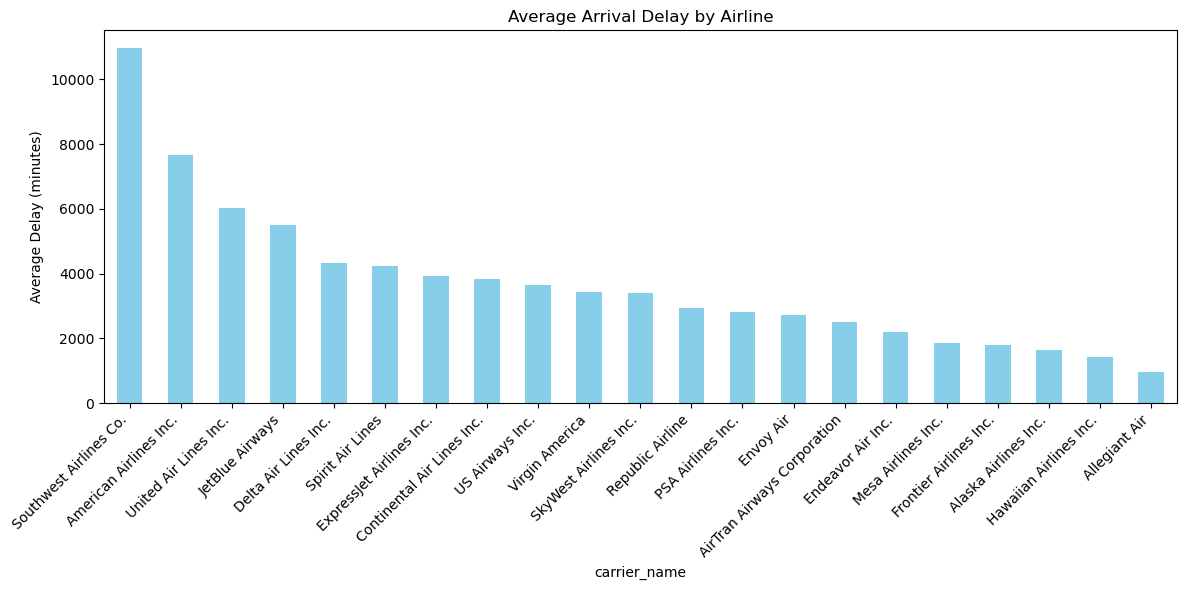

In [14]:
avg_delay = df.groupby('carrier_name')['min_delay'].mean().compute().sort_values(ascending=False)

plt.figure(figsize=(12,6))
avg_delay.plot(kind='bar', color='skyblue')
plt.title('Average Arrival Delay by Airline')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show() # bargraph of 10 busiest airports 


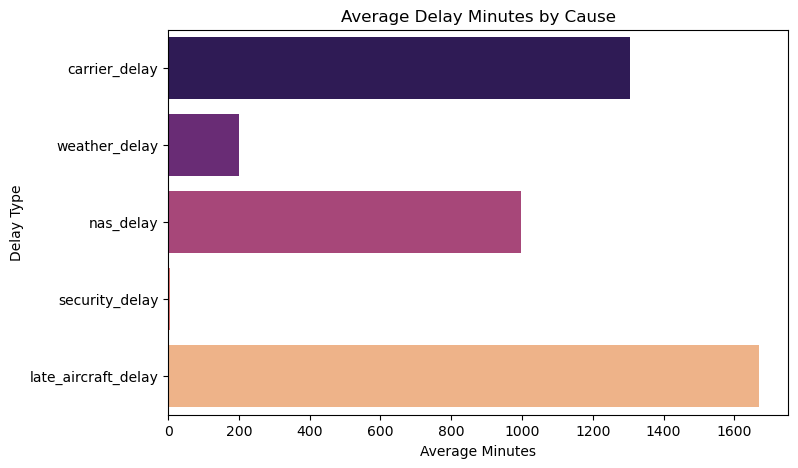

In [16]:
delay_causes = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].mean().compute()

plt.figure(figsize=(8,5))
sns.barplot(x=delay_causes.values, y=delay_causes.index, palette='magma')
plt.title('Average Delay Minutes by Cause')
plt.xlabel('Average Minutes')
plt.ylabel('Delay Type')
plt.show() # Heatmaps of delay causes
